In [1]:
import os
import pandas as pd

In [2]:
os.listdir("experiments/oha")

['oha-4', 'oha-3', 'oha-2', 'oha-5', 'oha-6', 'oha-1']

# OHA

In [3]:
import json
import re

def get_rps_from_output(exp_dir: str):
    with open (os.path.join(exp_dir, 'out.txt'), 'r') as f:
        content = f.read()

    # Use regular expressions to find the RPS value
    match = re.search(r'Requests/sec:\s+([\d.]+)', content)
    if match:
        rps_value = float(match.group(1))
        # print(f'Requests/sec: {rps_value}')
    else:
        # print('Requests/sec value not found')
        rps_value = None
    return rps_value

experiments = [ (exp, os.path.join('experiments/oha', exp)) for exp in os.listdir('experiments/oha')]
experiments_metadata = [ json.load(open(os.path.join(exp[1], 'exp_metadata.json'))) for exp in experiments]
experiments_metadata = [ {**exp, 'exp': exp_dir[0], 'exp_dir': exp_dir[1], 'rps': get_rps_from_output(exp_dir[1])} for exp, exp_dir in zip(experiments_metadata, experiments)]
experiments_metadata

[{'name': 'oha-4',
  'description': 'oha-4 basic oha experiment',
  'parameters': ['--no-tui', '--latency-correction', '-z 480s', '-q 1000000'],
  'experiment-categories': ['time-based-rps-increase'],
  'tags': ['oha', 'small'],
  'exp': 'oha-4',
  'exp_dir': 'experiments/oha/oha-4',
  'rps': 175808.524},
 {'name': 'oha-3',
  'description': 'oha-3 basic oha experiment',
  'parameters': ['--no-tui', '--latency-correction', '-z 240s', '-q 1000000'],
  'experiment-categories': ['time-based-rps-increase'],
  'tags': ['oha', 'small'],
  'exp': 'oha-3',
  'exp_dir': 'experiments/oha/oha-3',
  'rps': 172160.6277},
 {'name': 'oha-2',
  'description': 'oha-2 basic oha experiment',
  'parameters': ['--no-tui', '--latency-correction', '-z 120s', '-q 1000000'],
  'experiment-categories': ['time-based-rps-increase'],
  'tags': ['oha', 'small'],
  'exp': 'oha-2',
  'exp_dir': 'experiments/oha/oha-2',
  'rps': 183634.582},
 {'name': 'oha-5',
  'description': 'oha-5 basic oha experiment with keepalive

In [4]:
import pandas as pd


def read_exp_results(exp: dict):
    results = pd.read_csv(os.path.join(exp['exp_dir'], 'results.csv'))
    results['exp_dir'] = exp['exp_dir']
    results['experiment'] = exp['exp']
    results['categories'] = f"{exp['experiment-categories']}"
    results['rps'] = exp['rps']
    return results


results = pd.concat([read_exp_results(exp) for exp in experiments_metadata])
results.to_csv('plot/oha_results.csv', index=False)
results 

/var/folders/8l/yqn44_6d3szb3y0xxkg7qz7r0000gn/T/ipykernel_78344/4145687201.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([read_exp_results(exp) for exp in experiments_metadata])


,Time (s),CPU (%),MEM (KB),Bandwidth (KB/s),Bandwidth Utilization (%),Open Sockets,exp_dir,experiment,categories,rps
0,0,1140.0,25148,155968.0,12.19,50,experiments/oha/oha-4,oha-4,['time-based-rps-increase'],175808.5240
1,5,1104.0,216832,173754.0,13.57,46,experiments/oha/oha-4,oha-4,['time-based-rps-increase'],175808.5240
2,11,1137.0,377512,172138.0,13.45,40,experiments/oha/oha-4,oha-4,['time-based-rps-increase'],175808.5240
3,16,1146.0,558480,149991.0,11.72,40,experiments/oha/oha-4,oha-4,['time-based-rps-increase'],175808.5240
4,21,1200.0,711840,149914.0,11.71,50,experiments/oha/oha-4,oha-4,['time-based-rps-increase'],175808.5240
...,...,...,...,...,...,...,...,...,...,...
7,37,1013.0,1169868,129608.0,10.13,45,experiments/oha/oha-1,oha-1,['time-based-rps-increase'],174445.1054
8,42,1160.0,1360364,164593.0,12.86,48,experiments/oha/oha-1,oha-1,['time-based-rps-increase'],174445.1054
9,47,1150.0,1543104,173026.0,13.52,45,experiments/oha/oha-1,oha-1,['time-based-rps-increase'],174445.1054
10,52,1180.0,1718984,162206.0,12.67,48,experiments/oha/oha-1,oha-1,['time-based-rps-increase'],174445.1054


  experiment          rps  Time (s)
0      oha-1  174445.1054        58
1      oha-2  183634.5820       120
2      oha-3  172160.6277       235
3      oha-4  175808.5240       480
4      oha-5   10298.1215       117


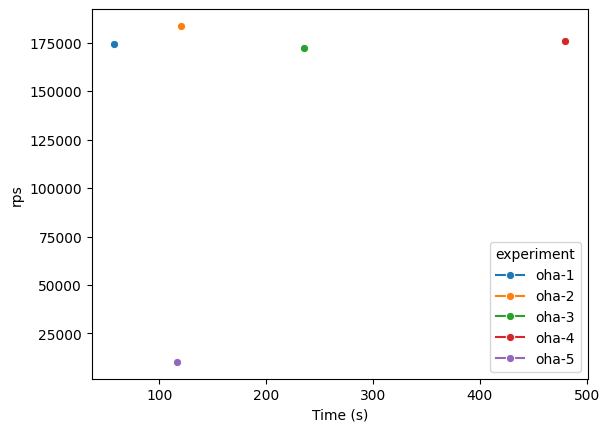

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_rps_vs_time(experiments_df: pd.DataFrame):
    df_grouped = experiments_df.groupby('experiment').agg({'rps': 'max', 'Time (s)': 'max'}).reset_index()
    print(df_grouped)
    sns.lineplot(data=df_grouped, x='Time (s)', y='rps', hue='experiment', marker='o')
    plt.show()

plot_rps_vs_time(results)

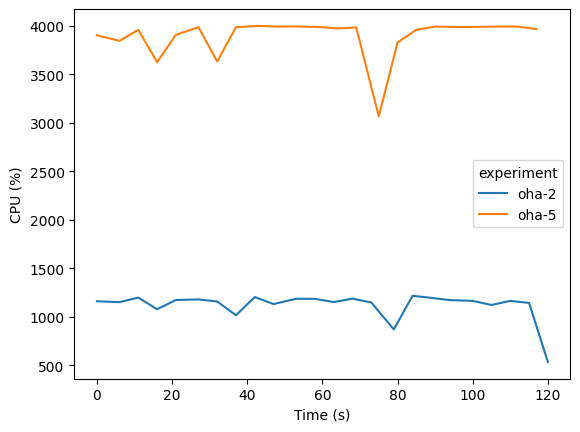

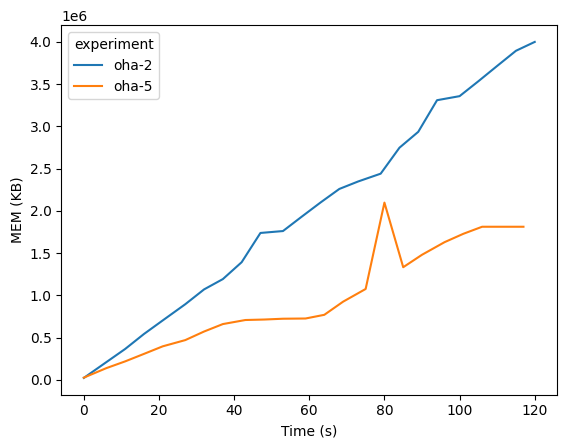

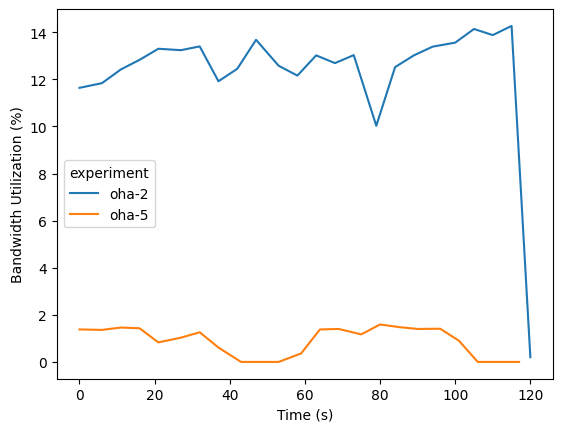

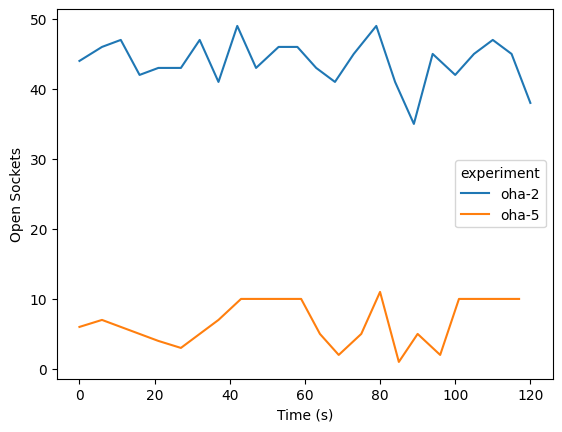

In [19]:
# experiment oha-4 and oha-5 plot CPU vs time, Memory vs time, Bandwidth vs time, and Open Sockets vs time
def plot_metrics_vs_time(experiments_df: pd.DataFrame, metrics: list):
    for metric in metrics:
        sns.lineplot(data=experiments_df, x='Time (s)', y=metric, hue='experiment')
        plt.show()

plot_metrics_vs_time(results[results['experiment'].isin(['oha-2', 'oha-5'])], ['CPU (%)', 'MEM (KB)', 'Bandwidth Utilization (%)', 'Open Sockets'])